# DataScience Final Project Sample Program

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Skip this if you are using Python IDLE
%matplotlib inline 

In [2]:
# Make sure that the CSV file is in the same folder
df = pd.read_csv('BCSEA_Marks.csv')

In [3]:
# Displaying the first five data
df.head()

,Student,English,Mathematics,Science
0,201601.0,48.0,45.0,48.0
1,201602.0,50.0,33.0,36.0
2,201603.0,66.0,62.0,61.0
3,201604.0,51.0,38.0,32.0
4,201605.0,56.0,71.0,53.0


In [4]:
# Displaying the bottom five data
df.tail()

,Student,English,Mathematics,Science
12175,213776.0,54.0,55.0,45.0
12176,213777.0,44.0,44.0,32.0
12177,213778.0,42.0,37.0,32.0
12178,213779.0,54.0,43.0,45.0
12179,213780.0,39.0,42.0,47.0


In [5]:
# Checking the datatypes and missing values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Student      12179 non-null  float64
 1   English      12178 non-null  float64
 2   Mathematics  12176 non-null  float64
 3   Science      12170 non-null  float64
dtypes: float64(4)
memory usage: 380.8 KB


In [6]:
# Data cleaning
# Removing the rows with missing values
# Original rows
print(f"Before dropna:{df.shape}")
df = df.dropna()
print(f"After dropna:{df.shape}")
columns_to_check = ['English','Mathematics','Science']

df = df[~(df[columns_to_check] == 0).any(axis=1)]
# No of rows after deleting the missing values
print(f"After removing zeros:{df.shape}")

Before dropna:(12180, 4)
After dropna:(12163, 4)
After removing zeros:(11973, 4)


# Numerical analysis and visualization

In [7]:
eng = df['English']
mat = df['Mathematics']
sci = df['Science']

In [8]:
# Maximum number of students score (mode)
print(sci.mode())

0    35.0
Name: Science, dtype: float64


In [9]:
# Calculating correlation between science and mathematics
corr_eng_math = df['Science'].corr(df['Mathematics'])
print(f'Correlation b/w English & Mathematics: {round(corr_eng_math,1)}')

Correlation b/w English & Mathematics: 0.8


In [10]:
# Converting pandas series to numpy array
# NumPy skips nan values for calculation whereas pandas considers nan values
eng = eng.to_numpy()
mat = mat.to_numpy()
sci = sci.to_numpy()

In [11]:
# Mean marks - subjectwise
print(f'English mean:{round(eng.mean(),1)}')
print(f'Mathematics mean:{round(mat.mean(),1)}')
print(f'Science mean:{round(sci.mean(),1)}')

English mean:54.2
Mathematics mean:53.5
Science mean:49.4


In [12]:
# Standard Deviation (subjectwise)
print(f'English std:{round(eng.std(),1)}')
print(f'Mathematics std:{round(mat.std(),1)}')
print(f'Science std:{round(sci.std(),1)}')
#The standard deviation are low which indicates that the marks are close to mean and is not deviated from the mean

English std:8.3
Mathematics std:14.6
Science std:14.5


In [13]:
# Sorting the data in descending order
df = df.sort_values(by=['Mathematics'],ascending=False)

In [14]:
# Top 10 performer in Mathematics
df.head(10)

,Student,English,Mathematics,Science
5043,206644.0,70.0,99.0,93.0
1129,202730.0,74.0,98.0,90.0
11150,212751.0,76.0,97.0,90.0
9595,211196.0,59.0,97.0,84.0
2689,204290.0,69.0,97.0,88.0
1846,203447.0,74.0,97.0,86.0
3982,205583.0,67.0,96.0,85.0
3191,204792.0,82.0,96.0,95.0
4302,205903.0,64.0,96.0,77.0
3953,205554.0,74.0,96.0,86.0


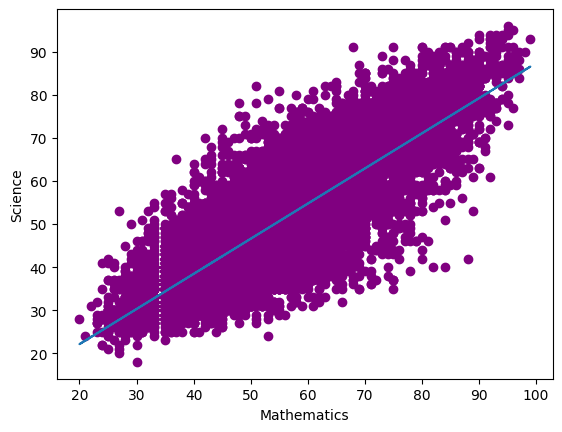

In [15]:
# Finding line of best fit
a, b = np.polyfit(mat, sci, 1)
# Ploting scatter plot
plt.scatter(mat, sci,color='purple')
#add line of best fit to plot
plt.plot(mat, a*mat+b)
plt.xlabel('Mathematics')
plt.ylabel('Science')
plt.show()

<BarContainer object of 3 artists>

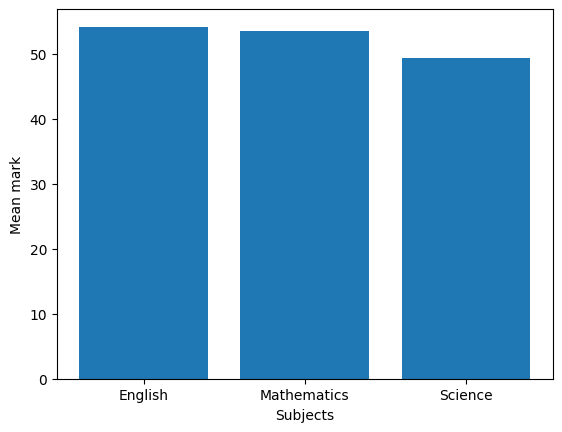

In [16]:
# Bar chart on mean marks
sub = ['English','Mathematics','Science']
mean_value = [round(eng.mean(),1),round(mat.mean(),1),round(sci.mean(),1)]
plt.xlabel('Subjects')
plt.ylabel('Mean mark')
plt.bar(sub,mean_value)